# Chatbot with External Tools

This notebook demonstrates how to add external tools to the chatbot using LangGraph.

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

## Openai
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")


# Nvidia
os.environ["NVIDIA_API_KEY"] = os.getenv("NVIDIA_API_KEY")

## langsmith tracking
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")

## Huggingface
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

## Neo4j
os.environ["NEO4J_URI"] = os.getenv("NEO4J_URI")
os.environ["NEO4J_USERNAME"] = os.getenv("NEO4J_USERNAME")
os.environ["NEO4J_PASSWORD"] = os.getenv("NEO4J_PASSWORD")

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [3]:
## Working With Tools

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv And Wikipedia tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [4]:
tools=[wiki_tool,arxiv_tool]

In [5]:
llm_with_tools=llm.bind_tools(tools=tools)

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": llm_with_tools.invoke(state["messages"])}



In [7]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")

In [8]:
graph = graph_builder.compile()

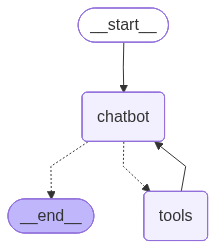

In [9]:
from IPython.display import display, Image
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [14]:
user_input="what is ZCA and PCA?"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

what is ZCA and PCA?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_gNI2P7ftc6WJWxBDz240d52I)
 Call ID: call_gNI2P7ftc6WJWxBDz240d52I
  Args:
    query: ZCA
  wikipedia (call_ICMz5tpjcYljKmoo73Qi7KJc)
 Call ID: call_ICMz5tpjcYljKmoo73Qi7KJc
  Args:
    query: PCA
================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================

It seems that I couldn't find specific Wikipedia entries for ZCA (Zero Component Analysis) and PCA (Principal Component Analysis). However, I can provide you with a brief explanation of both concepts:

### PCA (Principal Component Analysis)
PCA is a statistical technique used for dimensionality reduction. It transforms a dataset into a set of orthogonal (uncorrelate